## Cosine Similaruty

<p>Cosine similarity measures the similarity between two vectors by calculating the cosine of the angle between the two vectors.</p>

<p>Cosine Similaruty values ranges between 0 to 1</p>

<p> Close to 0 => they are not similar</p>
<p> Close to 1 => they are similar</p>

To find Cosimilarity that exist in a vector

<img src="https://miro.medium.com/max/700/1*LfW66-WsYkFqWc4XYJbEJg.png"></img>
<a href="https://towardsdatascience.com/cosine-similarity-how-does-it-measure-the-similarity-maths-behind-and-usage-in-python-50ad30aad7db">Source link</a>

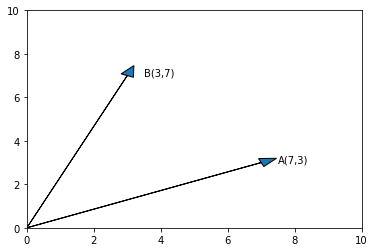

Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# consider two vectors A and B in 2-D
A=np.array([7,3])
B=np.array([3,7])
ax = plt.axes()

ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)
plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))
ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)
plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()

# cosine similarity between A and B
cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

print (f"Cosine Similarity between A and B:{cos_sim}")
print (f"Cosine Distance between A and B:{1-cos_sim}")

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
A=np.array([7,3])
B=np.array([3,7])
cos_sine = cosine_similarity(A.reshape(1,-1),B.reshape(1,-1))
print(cos_sine)

[[0.72413793]]


----

In [7]:
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support "
doc_election = "President Trump says Putin had no political interference is the election outcome. He says "
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the"
doc_afsan = 'He is the learnnay instructor and a ml engineer'
documents = [doc_trump, doc_election, doc_putin, doc_afsan]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [9]:
counter_vector_data = CountVectorizer(stop_words='english')
sparse_matrix = counter_vector_data.fit_transform(documents)

In [13]:
counter_vector_data.get_feature_names()

C:\Users\Melwin\.conda\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['election',
 'elections',
 'engineer',
 'instructor',
 'interference',
 'learnnay',
 'lost',
 'ml',
 'mr',
 'outcome',
 'political',
 'post',
 'president',
 'putin',
 'russia',
 'says',
 'served',
 'support',
 'trump',
 'vladimir',
 'winning']

In [11]:
sparse_matrix.todense()

matrix([[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int64)

In [12]:
df = pd.DataFrame(sparse_matrix.todense(), columns = counter_vector_data.get_feature_names(),
                  index = ['doc_trump', 'doc_election', 'doc_putin', 'doc_afsan'])
df

C:\Users\Melwin\.conda\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,election,elections,engineer,instructor,interference,learnnay,lost,ml,mr,outcome,...,post,president,putin,russia,says,served,support,trump,vladimir,winning
doc_trump,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,1,1,0,1
doc_election,1,0,0,0,1,0,0,0,0,1,...,0,1,1,0,2,0,0,1,0,0
doc_putin,0,1,0,0,0,0,0,0,0,0,...,1,2,2,1,0,1,0,0,1,0
doc_afsan,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
cosine_similarity(df, df)

array([[1.        , 0.42640143, 0.19611614, 0.        ],
       [0.42640143, 1.        , 0.3344968 , 0.        ],
       [0.19611614, 0.3344968 , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])